In [54]:
artist_file = 'kanya_west.txt'
with open(artist_file) as f: # The with keyword automatically closes the file when you are done
    print (f.read(1000))


Eighteen years eighteen years
She got one of your kids got you for eighteen years
I know somebody paying child support for one of his kids
His baby mama car and crib is bigger than his
You will see him on TV any given Sunday
Win the Super Bowl and drive off in a Hyundai
She was supposed to buy your shorty Tyco with your money
She went to the doctor got lipo with your money
She walking around looking like Michael with your money
Shouldve got that insured Geico for your money
If you aint no punk
Holla We want prenup We want prenup Yeah
Its something that you need to have
Cause when she leave your ass she gon leave with half
Eighteen years eighteen years
And on the the birthday he found out it wasnt his
Now I aint saying you a gold digger you got needs
You dont want a dude to smoke but he cant buy weed
You go out to eat and he cant pay yall cant leave
Theres dishes in the back he gotta roll up your sleeves
But while yall washin watch him
He gone make it into a Benz out of that Datsun
He 

In [51]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
def plotWordFrequency(input):
    f = open(artist_file,'r')
    words = [x for y in [l.split() for l in f.readlines()] for x in y]
    data = sorted([(w, words.count(w)) for w in set(words)], key = lambda x:x[1], reverse=True)[:40] 
    most_words = [x[0] for x in data]
    times_used = [int(x[1]) for x in data]
    plt.figure(figsize=(20,10))
    plt.bar(x=sorted(most_words), height=times_used, color = 'grey', edgecolor = 'black',  width=.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(rotation=0, fontsize=18)
    plt.xlabel('Most Common Words:', fontsize=18)
    plt.ylabel('Number of Occurences:', fontsize=18)
    plt.title('Most Commonly Used Words: %s' % (artist_file), fontsize=24)
    plt.show()

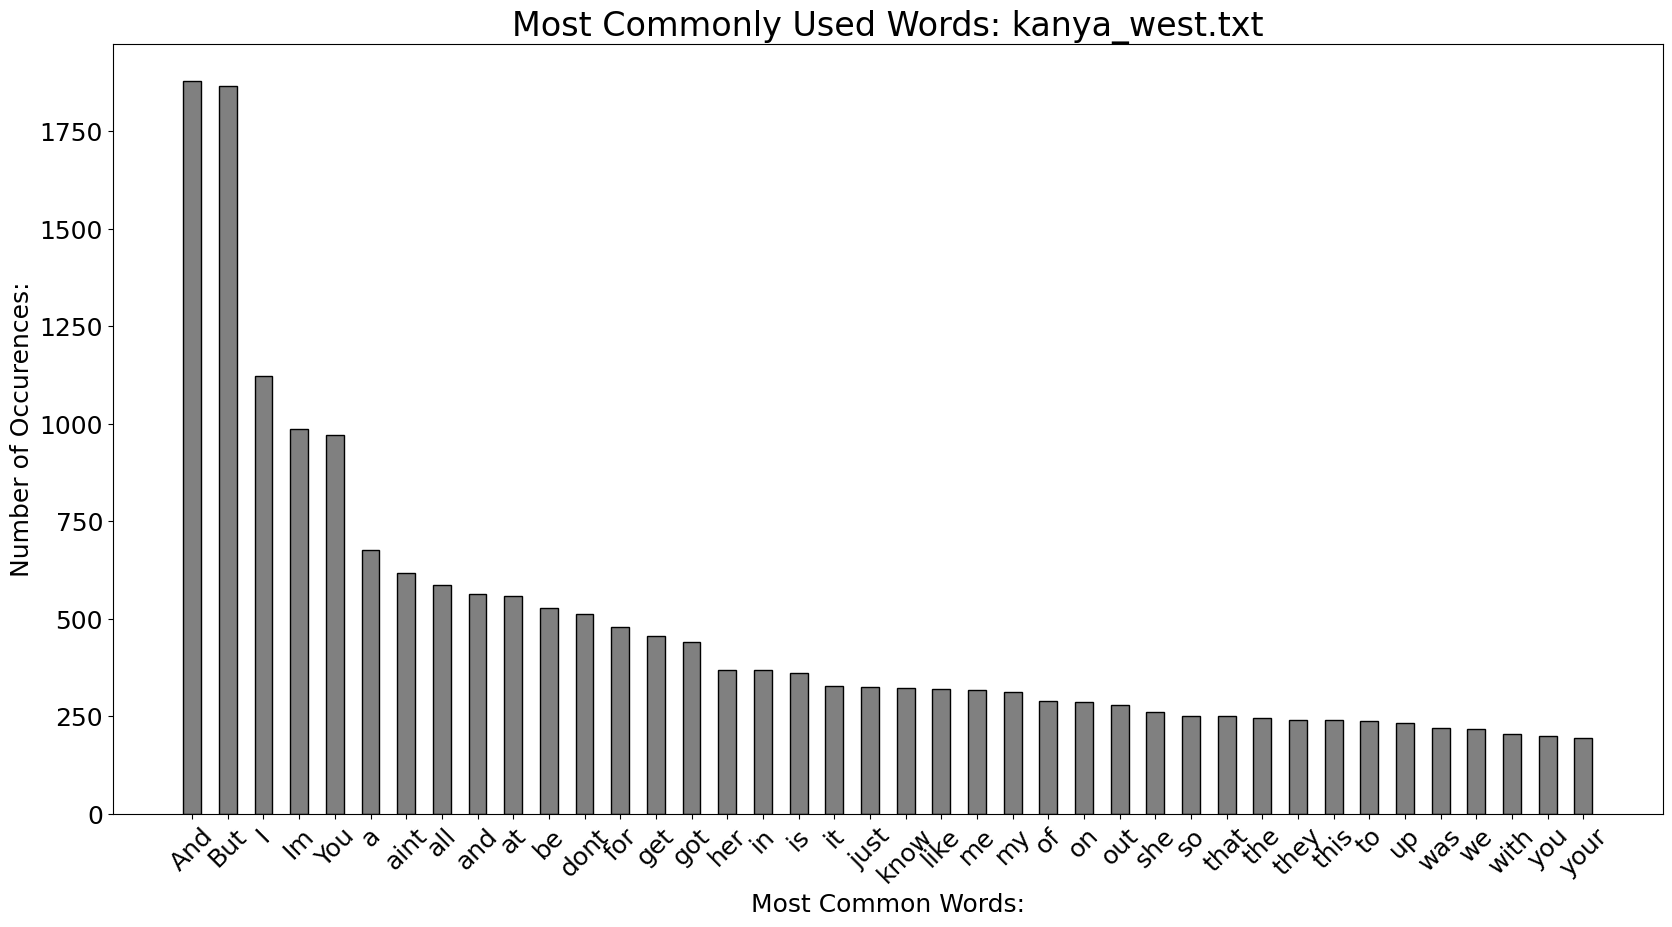

In [55]:
artist_file = 'kanya_west.txt'
plotWordFrequency(artist_file)

In [15]:
%pip install pronouncing

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 6.0 MB/s eta 0:00:00a 0:00:01
  Created wheel for pronouncing: filename=pronouncing-0.2.0-py2.py3-none-any.whl size=6234 sha256=f1b95a8267ebbc7f6b58cc839f9a5e30bdce81686a65516c7a76d5f5446c7649
  Stored in directory: /Users/moumitamac/Library/Caches/pip/wheels/8b/81/fd/7edbf09827c7a7e2666e870b4c5c6b46c7ebd5defa399698bd
Successfully built pronouncing
Note: you may need to restart the kernel to use updated packages.


In [17]:
%pip install markovify

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.7 MB/s eta 0:00:00a 0:00:01
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18606 sha256=11e42c552a507f1f80d1770eb1772c92b6ab3a4780c35ee4b8c4ec1b60db738d
  Stored in directory: /Users/moumitamac/Library/Caches/pip/wheels/9c/20/eb/1a3fb93f3132f2f9683e4efd834800f80c53aeddf50e84ae80
Successfully built markovify
Note: you may need to restart the kernel to use updated packages.


In [23]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [25]:
%pip install --upgrade keras

  Using cached keras-3.0.4-py3-none-any.whl.metadata (4.8 kB)
Using cached keras-3.0.4-py3-none-any.whl (1.0 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [34]:
import pronouncing
import markovify
import re
import random
import numpy as np
import os
import keras
from keras.models import Sequential
from keras.layers import LSTM 
from tensorflow.keras.layers import Dense

In [35]:
# RNN
def create_network(depth):
	model = Sequential()
	model.add(LSTM(4, input_shape=(2, 2), return_sequences=True))
	for i in range(depth):
		model.add(LSTM(8, return_sequences=True))
	model.add(LSTM(2, return_sequences=True))
	model.summary()
	model.compile(optimizer='rmsprop',
              loss='mse')
	if artist + ".rap" in os.listdir(".") and train_mode == False:
		model.load_weights(str(artist + ".rap"))
		print("loading saved network: " + str(artist) + ".rap") 
	return model

In [3]:
# Markov chain
def markov(text_file):
    ######
	read = open(text_file, "r", encoding='utf-8').read()
	text_model = markovify.NewlineText(read)
	return text_model

In [44]:
# Determine number of syllables in line
def syllables(line):
	count = 0
	for word in line.split(" "):
		vowels = 'aeiouy'
# 		word = word.lower().strip("!@#$%^&*()_+-={}[];:,.<>/?")
		word = word.lower().strip(".:;?!")
		if len(word) > 0 and word[0] in vowels:
			count += 1
		for index in range(1,len(word)):
			if word[index] in vowels and word[index-1] not in vowels:
				count +=1
		if word.endswith('e'):
			count -= 1
		if word.endswith('le'):
			count+=1
		if count == 0:
			count +=1
	return count / maxsyllables

In [5]:
# Make index of words that rhyme with your word
def rhymeindex(lyrics):
	if str(artist) + ".rhymes" in os.listdir(".") and train_mode == False:
		print ("loading saved rhymes from " + str(artist) + ".rhymes")
		return open(str(artist) + ".rhymes", "r",encoding='utf-8').read().split("\n")
	else:
		rhyme_master_list = []
		print ("Building list of rhymes:")
		for i in lyrics:
			word = re.sub(r"\W+", '', i.split(" ")[-1]).lower()
			rhymeslist = pronouncing.rhymes(word)
			rhymeslistends = []      
			for i in rhymeslist:
				rhymeslistends.append(i[-2:])
			try:
				rhymescheme = max(set(rhymeslistends), key=rhymeslistends.count)
			except Exception:
				rhymescheme = word[-2:]
			rhyme_master_list.append(rhymescheme)
		rhyme_master_list = list(set(rhyme_master_list))
		reverselist = [x[::-1] for x in rhyme_master_list]
		reverselist = sorted(reverselist)
		rhymelist = [x[::-1] for x in reverselist]
		print("List of Sorted 2-Letter Rhyme Ends:")
		print(rhymelist)
		f = open(str(artist) + ".rhymes", "w", encoding='utf-8')
		f.write("\n".join(rhymelist))
		f.close()
		return rhymelist

In [6]:
# Make index of rhymes that you use
def rhyme(line, rhyme_list):
	word = re.sub(r"\W+", '', line.split(" ")[-1]).lower()
	rhymeslist = pronouncing.rhymes(word)
	rhymeslistends = []
	for i in rhymeslist:
		rhymeslistends.append(i[-2:])
	try:
		rhymescheme = max(set(rhymeslistends), key=rhymeslistends.count)
	except Exception:
		rhymescheme = word[-2:]
	try:
		float_rhyme = rhyme_list.index(rhymescheme)
		float_rhyme = float_rhyme / float(len(rhyme_list))
		return float_rhyme
	except Exception:
		float_rhyme = None
		return float_rhyme

In [7]:
# Separate each line of the input txt
def split_lyrics_file(text_file):
	text = open(text_file, encoding='utf-8').read()
	text = text.split("\n")
	while "" in text:
		text.remove("")
	return text

In [8]:
# Generate lyrics
def generate_lyrics(text_model, text_file):
	bars = []
	last_words = []
	lyriclength = len(open(text_file,encoding='utf-8').read().split("\n"))
	count = 0
	markov_model = markov(text_file)
	
	while len(bars) < lyriclength / 9 and count < lyriclength * 2:
		bar = markov_model.make_sentence(max_overlap_ratio = .49, tries=100)
		if type(bar) != type(None) and syllables(bar) < 1:
			def get_last_word(bar):
				last_word = bar.split(" ")[-1]
				if last_word[-1] in "!.?,":
					last_word = last_word[:-1]
				return last_word
			last_word = get_last_word(bar)
			if bar not in bars and last_words.count(last_word) < 3:
				bars.append(bar)
				last_words.append(last_word)
				count += 1
	return bars

In [9]:
# Build dataset
def build_dataset(lines, rhyme_list):
	dataset = []
	line_list = []
	for line in lines:
		line_list = [line, syllables(line), rhyme(line, rhyme_list)]
		dataset.append(line_list)
	x_data = []
	y_data = []
	for i in range(len(dataset) - 3):
		line1 = dataset[i    ][1:]
		line2 = dataset[i + 1][1:]
		line3 = dataset[i + 2][1:]
		line4 = dataset[i + 3][1:]
		x = [line1[0], line1[1], line2[0], line2[1]]
		x = np.array(x)
		x = x.reshape(2,2)
		x_data.append(x)
		y = [line3[0], line3[1], line4[0], line4[1]]
		y = np.array(y)
		y = y.reshape(2,2)
		y_data.append(y)
	x_data = np.array(x_data)
	y_data = np.array(y_data)
	return x_data, y_data

In [10]:
# Compose verse
def compose_rap(lines, rhyme_list, lyrics_file, model):
	rap_vectors = []
	human_lyrics = split_lyrics_file(lyrics_file)
	initial_index = random.choice(range(len(human_lyrics) - 1))
	initial_lines = human_lyrics[initial_index:initial_index + 2]
	starting_input = []
	for line in initial_lines:
		starting_input.append([syllables(line), rhyme(line, rhyme_list)])
	starting_vectors = model.predict(np.array([starting_input]).flatten().reshape(1, 2, 2))
	rap_vectors.append(starting_vectors)
	for i in range(100):
		rap_vectors.append(model.predict(np.array([rap_vectors[-1]]).flatten().reshape(1, 2, 2)))
	return rap_vectors

In [11]:
# Compose verse pt 2
def vectors_into_song(vectors, generated_lyrics, rhyme_list):
	print ("\n\n")	
	print ("Writing verse:")
	print ("\n\n")
	def last_word_compare(rap, line2):
		penalty = 0 
		for line1 in rap:
			word1 = line1.split(" ")[-1]
			word2 = line2.split(" ")[-1]
			while word1[-1] in "?!,. ":
				word1 = word1[:-1]
			while word2[-1] in "?!,. ":
				word2 = word2[:-1]
			if word1 == word2:
				penalty += 0.2
		return penalty
	def calculate_score(vector_half, syllables, rhyme, penalty):
		desired_syllables = vector_half[0]
		desired_rhyme = vector_half[1]
		desired_syllables = desired_syllables * maxsyllables
		desired_rhyme = desired_rhyme * len(rhyme_list)
		score = 1.0 - abs(float(desired_syllables) - float(syllables)) + abs(float(desired_rhyme) - float(rhyme)) - penalty
		return score
	dataset = []
	for line in generated_lyrics:
		line_list = [line, syllables(line), rhyme(line, rhyme_list)]
		dataset.append(line_list)
	rap = []
	vector_halves = []
	for vector in vectors:
		vector_halves.append(list(vector[0][0])) 
		vector_halves.append(list(vector[0][1]))
	for vector in vector_halves:
		scorelist = []
		for item in dataset:
			line = item[0]
			if len(rap) != 0:
				penalty = last_word_compare(rap, line)
			else:
				penalty = 0
			total_score = calculate_score(vector, item[1], item[2], penalty)
			score_entry = [line, total_score]
			scorelist.append(score_entry)
		fixed_score_list = [0]
		for score in scorelist:
			fixed_score_list.append(float(score[1]))
		max_score = max(fixed_score_list)
		for item in scorelist:
			if item[1] == max_score:
				rap.append(item[0])
				print (str(item[0]))
				for i in dataset:
					if item[0] == i[0]:
						dataset.remove(i)
						break
				break     
	return rap

In [27]:
# Training function
def train(x_data, y_data, model):
	model.fit(np.array(x_data), np.array(y_data),
			  batch_size=2,
			  epochs=5,
			  verbose=1)
	model.save_weights(artist + ".weights.h5")

In [20]:
# Train and run
def main(depth, train_mode):
	model = create_network(depth)
	text_model = markov(text_file)
	if train_mode == True:
		bars = split_lyrics_file(text_file)
	if train_mode == False:
		bars = generate_lyrics(text_model, text_file)
	rhyme_list = rhymeindex(bars)
	if train_mode == True:
		x_data, y_data = build_dataset(bars, rhyme_list)
		train(x_data, y_data, model)
	if train_mode == False:
		vectors = compose_rap(bars, rhyme_list, text_file, model)
		rap = vectors_into_song(vectors, bars, rhyme_list)
		f = open(rap_file, "w", encoding='utf-8')
		for bar in rap:
			f.write(bar)
			f.write("\n")

In [41]:
depth = 4 
maxsyllables = 8
artist = "artist"
rap_file = "temporary_poem.txt"

In [56]:
maxsyllables = 8
text_file = "kanya_west.txt"
train_mode = True
main(depth, train_mode)
train_mode = False
main(depth, train_mode)

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lstm_138 (LSTM)                 │ (None, 2, 4)              │        112 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_139 (LSTM)                 │ (None, 2, 8)              │        416 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_140 (LSTM)                 │ (None, 2, 8)              │        544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_141 (LSTM)                 │ (None, 2, 8)              │        544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_142 (LSTM)                 │ (None, 2, 8)              │        544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_143 (LSTM)                 │ (None, 2, 2)              │         88 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,248 (8.78 KB)

 Trainable params: 2,248 (8.78 KB)

 Non-trainable params: 0 (0.00 B)

Building list of rhymes:
List of Sorted 2-Letter Rhyme Ends:
['', "s'", 'a', 'aa', 'ba', 'ca', 'da', 'ga', 'ha', 'ia', 'ja', 'ka', 'la', 'ma', 'na', 'pa', 'ra', 'sa', 'ta', 'va', 'ya', 'za', 'ab', 'eb', 'ib', 'ob', 'ub', 'ac', 'fc', 'ic', 'oc', 'ad', 'ed', 'id', 'ld', 'nd', 'od', 'rd', 'ud', 'be', 'ce', 'de', 'ee', 'fe', 'ge', 'he', 'ie', 'ke', 'le', 'me', 'ne', 'oe', 'pe', 're', 'se', 'te', 've', 'ye', 'ze', 'af', 'ef', 'ff', 'if', 'lf', 'of', 'ag', 'eg', 'gg', 'ig', 'ng', 'og', 'rg', 'ug', 'ah', 'ch', 'gh', 'hh', 'oh', 'ph', 'sh', 'th', 'uh', 'ai', 'ci', 'gi', 'ii', 'ki', 'li', 'mi', 'ni', 'ri', 'ti', 'zi', 'pj', 'tj', 'ck', 'ek', 'ik', 'lk', 'nk', 'ok', 'rk', 'sk', 'al', 'el', 'hl', 'il', 'll', 'ol', 'rl', 'tl', 'ul', 'xl', 'am', 'bm', 'em', 'hm', 'im', 'lm', 'mm', 'om', 'rm', 'sm', 'um', 'ëm', 'an', 'en', 'gn', 'in', 'mn', 'nn', 'on', 'rn', 'un', 'wn', 'yn', 'ao', 'co', 'do', 'eo', 'fo', 'go', 'io', 'lo', 'mo', 'no', 'oo', 'po', 'ro', 'to', 'vo', 'zo', 'ap', 'ep', 'ip', 'lp', 'mp',

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lstm_144 (LSTM)                 │ (None, 2, 4)              │        112 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_145 (LSTM)                 │ (None, 2, 8)              │        416 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_146 (LSTM)                 │ (None, 2, 8)              │        544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_147 (LSTM)                 │ (None, 2, 8)              │        544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_148 (LSTM)                 │ (None, 2, 8)              │        544 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_149 (LSTM)                 │ (None, 2, 2)              │         88 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,248 (8.78 KB)

 Trainable params: 2,248 (8.78 KB)

 Non-trainable params: 0 (0.00 B)

loading saved rhymes from artist.rhymes
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━